# Phân tích dữ liệu ung tư vú
## Dự đoán bệnh nhân có bị ung thư vú không qua các thuộc tính:
- age
- menopause
- tumor-size
- inv-nodes
- node-caps
- deg-malig
- breast
- breast-quad
- irradiat
## Phân lớp
- class

## Phân tích dữ liệu và tiền xử lý

In [1]:
# Load libraries
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# model selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

# algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import sklearn

# metrics
from sklearn.metrics import accuracy_score, plot_confusion_matrix

import warnings
%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings("ignore")

In [2]:
# Load dataset
data_path  = "breast-cancer.csv"
data_names = ["age", "menopause", "tumor-size", "inv-nodes", "node-caps", "deg-malig", "breast", "breast-quad", "irradiat", "class"]
df_dataset = pd.read_csv(data_path, names = data_names)

In [3]:
# shape
print(f'+ Shape: {df_dataset.shape}')
# types
print(f'+ Data Types: \n{df_dataset.dtypes}')
# head, tail
print(f'+ Contents:')
display.display(df_dataset.head(5))
display.display(df_dataset.tail(5))
# info
df_dataset.info()

+ Shape: (286, 10)
+ Data Types: 
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
class          object
dtype: object
+ Contents:


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,'40-49','premeno','15-19','0-2','yes',3,'right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no',1,'right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no',2,'left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes',3,'right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes',2,'left','right_up','no','recurrence-events'


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
281,'50-59','ge40','30-34','6-8','yes',2,'left','left_low','no','no-recurrence-events'
282,'50-59','premeno','25-29','3-5','yes',2,'left','left_low','yes','no-recurrence-events'
283,'30-39','premeno','30-34','6-8','yes',2,'right','right_up','no','no-recurrence-events'
284,'50-59','premeno','15-19','0-2','no',2,'right','left_low','no','no-recurrence-events'
285,'50-59','ge40','40-44','0-2','no',3,'left','right_up','no','no-recurrence-events'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [4]:
df_clean = df_dataset.copy()
# shape
print(f'+ Shape: {df_clean.shape}')
# types
print(f'+ Data Types: \n{df_clean.dtypes}')
# head, tail
print(f'+ Contents: ')
display.display(df_clean.head(5))
display.display(df_clean.tail(5))
# info
df_clean.info()

+ Shape: (286, 10)
+ Data Types: 
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
class          object
dtype: object
+ Contents: 


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,'40-49','premeno','15-19','0-2','yes',3,'right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no',1,'right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no',2,'left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes',3,'right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes',2,'left','right_up','no','recurrence-events'


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
281,'50-59','ge40','30-34','6-8','yes',2,'left','left_low','no','no-recurrence-events'
282,'50-59','premeno','25-29','3-5','yes',2,'left','left_low','yes','no-recurrence-events'
283,'30-39','premeno','30-34','6-8','yes',2,'right','right_up','no','no-recurrence-events'
284,'50-59','premeno','15-19','0-2','no',2,'right','left_low','no','no-recurrence-events'
285,'50-59','ge40','40-44','0-2','no',3,'left','right_up','no','no-recurrence-events'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [5]:
has_null = df_clean.isnull().sum().any()
has_nan  = df_clean.isna().sum().any()
n_duplicated = df_clean.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_clean[df_clean.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_clean[df_clean.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated>0:
    display.display(df_clean[df_clean.duplicated()])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: True


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
20,'50-59','lt40','20-24','0-2',NaN,1,'left','left_low','no','recurrence-events'
31,'60-69','ge40','25-29','3-5',NaN,1,'right','left_low','yes','no-recurrence-events'
50,'70-79','ge40','15-19','9-11',NaN,1,'left','left_low','yes','recurrence-events'
54,'40-49','premeno','25-29','0-2',NaN,2,'left','right_low','yes','no-recurrence-events'
71,'60-69','ge40','25-29','3-5',NaN,1,'right','left_up','yes','no-recurrence-events'
92,'50-59','lt40','20-24','0-2',NaN,1,'left','left_up','no','recurrence-events'
149,'50-59','ge40','30-34','9-11',NaN,3,'left','left_up','yes','no-recurrence-events'
240,'50-59','ge40','30-34','0-2','no',3,'left',NaN,'no','recurrence-events'
264,'50-59','ge40','30-34','9-11',NaN,3,'left','left_low','yes','no-recurrence-events'


+ Có giá trị Nan: True


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
20,'50-59','lt40','20-24','0-2',NaN,1,'left','left_low','no','recurrence-events'
31,'60-69','ge40','25-29','3-5',NaN,1,'right','left_low','yes','no-recurrence-events'
50,'70-79','ge40','15-19','9-11',NaN,1,'left','left_low','yes','recurrence-events'
54,'40-49','premeno','25-29','0-2',NaN,2,'left','right_low','yes','no-recurrence-events'
71,'60-69','ge40','25-29','3-5',NaN,1,'right','left_up','yes','no-recurrence-events'
92,'50-59','lt40','20-24','0-2',NaN,1,'left','left_up','no','recurrence-events'
149,'50-59','ge40','30-34','9-11',NaN,3,'left','left_up','yes','no-recurrence-events'
240,'50-59','ge40','30-34','0-2','no',3,'left',NaN,'no','recurrence-events'
264,'50-59','ge40','30-34','9-11',NaN,3,'left','left_low','yes','no-recurrence-events'


+ Số dòng trùng: 14


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
17,'60-69','ge40','15-19','0-2','no',2,'right','left_up','no','no-recurrence-events'
27,'40-49','premeno','10-14','0-2','no',1,'right','left_up','no','no-recurrence-events'
44,'30-39','premeno','15-19','0-2','no',1,'left','left_low','no','no-recurrence-events'
65,'50-59','ge40','15-19','0-2','no',1,'right','central','no','no-recurrence-events'
117,'60-69','ge40','10-14','0-2','no',1,'left','left_up','no','no-recurrence-events'
178,'40-49','premeno','25-29','0-2','no',2,'right','left_low','no','recurrence-events'
190,'50-59','premeno','25-29','0-2','no',2,'left','right_up','no','recurrence-events'
214,'40-49','premeno','20-24','0-2','no',2,'right','left_up','no','no-recurrence-events'
217,'50-59','premeno','25-29','0-2','no',2,'left','left_low','no','no-recurrence-events'
221,'50-59','ge40','20-24','0-2','no',3,'left','left_up','no','no-recurrence-events'


In [6]:
df_clean["node-caps"].fillna("'no'", inplace=True)
df_clean["breast-quad"].fillna("'central'", inplace=True)

In [7]:
has_null = df_clean.isnull().sum().any()
has_nan  = df_clean.isna().sum().any()
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_clean[df_clean.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_clean[df_clean.isna().any(axis=1)])

+ Có giá trị Null: False
+ Có giá trị Nan: False


In [8]:
class_encoder = LabelEncoder()
class_encoder.fit(df_clean["class"])
class_names = class_encoder.classes_
print(class_names)

["'no-recurrence-events'" "'recurrence-events'"]


In [9]:
class_encoder.transform(df_clean["class"])

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
df_clean["class"] = class_encoder.transform(df_clean["class"])
df_clean

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,'40-49','premeno','15-19','0-2','yes',3,'right','left_up','no',1
1,'50-59','ge40','15-19','0-2','no',1,'right','central','no',0
2,'50-59','ge40','35-39','0-2','no',2,'left','left_low','no',1
3,'40-49','premeno','35-39','0-2','yes',3,'right','left_low','yes',0
4,'40-49','premeno','30-34','3-5','yes',2,'left','right_up','no',1
...,...,...,...,...,...,...,...,...,...,...
281,'50-59','ge40','30-34','6-8','yes',2,'left','left_low','no',0
282,'50-59','premeno','25-29','3-5','yes',2,'left','left_low','yes',0
283,'30-39','premeno','30-34','6-8','yes',2,'right','right_up','no',0
284,'50-59','premeno','15-19','0-2','no',2,'right','left_low','no',0


In [11]:
class_encoder.fit(df_clean["age"])
class_names = class_encoder.classes_
print(class_names)

class_encoder.transform(df_clean["age"])

df_clean["age"] = class_encoder.transform(df_clean["age"])
df_clean

["'20-29'" "'30-39'" "'40-49'" "'50-59'" "'60-69'" "'70-79'"]


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,2,'premeno','15-19','0-2','yes',3,'right','left_up','no',1
1,3,'ge40','15-19','0-2','no',1,'right','central','no',0
2,3,'ge40','35-39','0-2','no',2,'left','left_low','no',1
3,2,'premeno','35-39','0-2','yes',3,'right','left_low','yes',0
4,2,'premeno','30-34','3-5','yes',2,'left','right_up','no',1
...,...,...,...,...,...,...,...,...,...,...
281,3,'ge40','30-34','6-8','yes',2,'left','left_low','no',0
282,3,'premeno','25-29','3-5','yes',2,'left','left_low','yes',0
283,1,'premeno','30-34','6-8','yes',2,'right','right_up','no',0
284,3,'premeno','15-19','0-2','no',2,'right','left_low','no',0


In [12]:
class_encoder.fit(df_clean["menopause"])
class_names = class_encoder.classes_
print(class_names)

class_encoder.transform(df_clean["menopause"])

df_clean["menopause"] = class_encoder.transform(df_clean["menopause"])
df_clean

["'ge40'" "'lt40'" "'premeno'"]


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,2,2,'15-19','0-2','yes',3,'right','left_up','no',1
1,3,0,'15-19','0-2','no',1,'right','central','no',0
2,3,0,'35-39','0-2','no',2,'left','left_low','no',1
3,2,2,'35-39','0-2','yes',3,'right','left_low','yes',0
4,2,2,'30-34','3-5','yes',2,'left','right_up','no',1
...,...,...,...,...,...,...,...,...,...,...
281,3,0,'30-34','6-8','yes',2,'left','left_low','no',0
282,3,2,'25-29','3-5','yes',2,'left','left_low','yes',0
283,1,2,'30-34','6-8','yes',2,'right','right_up','no',0
284,3,2,'15-19','0-2','no',2,'right','left_low','no',0


In [13]:
class_encoder.fit(df_clean["tumor-size"])
class_names = class_encoder.classes_
print(class_names)

class_encoder.transform(df_clean["tumor-size"])

df_clean["tumor-size"] = class_encoder.transform(df_clean["tumor-size"])
df_clean

["'0-4'" "'10-14'" "'15-19'" "'20-24'" "'25-29'" "'30-34'" "'35-39'"
 "'40-44'" "'45-49'" "'5-9'" "'50-54'"]


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,2,2,2,'0-2','yes',3,'right','left_up','no',1
1,3,0,2,'0-2','no',1,'right','central','no',0
2,3,0,6,'0-2','no',2,'left','left_low','no',1
3,2,2,6,'0-2','yes',3,'right','left_low','yes',0
4,2,2,5,'3-5','yes',2,'left','right_up','no',1
...,...,...,...,...,...,...,...,...,...,...
281,3,0,5,'6-8','yes',2,'left','left_low','no',0
282,3,2,4,'3-5','yes',2,'left','left_low','yes',0
283,1,2,5,'6-8','yes',2,'right','right_up','no',0
284,3,2,2,'0-2','no',2,'right','left_low','no',0


In [14]:
class_encoder.fit(df_clean["inv-nodes"])
class_names = class_encoder.classes_
print(class_names)

class_encoder.transform(df_clean["inv-nodes"])

df_clean["inv-nodes"] = class_encoder.transform(df_clean["inv-nodes"])
df_clean

["'0-2'" "'12-14'" "'15-17'" "'24-26'" "'3-5'" "'6-8'" "'9-11'"]


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,2,2,2,0,'yes',3,'right','left_up','no',1
1,3,0,2,0,'no',1,'right','central','no',0
2,3,0,6,0,'no',2,'left','left_low','no',1
3,2,2,6,0,'yes',3,'right','left_low','yes',0
4,2,2,5,4,'yes',2,'left','right_up','no',1
...,...,...,...,...,...,...,...,...,...,...
281,3,0,5,5,'yes',2,'left','left_low','no',0
282,3,2,4,4,'yes',2,'left','left_low','yes',0
283,1,2,5,5,'yes',2,'right','right_up','no',0
284,3,2,2,0,'no',2,'right','left_low','no',0


In [15]:
class_encoder.fit(df_clean["node-caps"])
class_names = class_encoder.classes_
print(class_names)

class_encoder.transform(df_clean["node-caps"])

df_clean["node-caps"] = class_encoder.transform(df_clean["node-caps"])
df_clean

["'no'" "'yes'"]


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,2,2,2,0,1,3,'right','left_up','no',1
1,3,0,2,0,0,1,'right','central','no',0
2,3,0,6,0,0,2,'left','left_low','no',1
3,2,2,6,0,1,3,'right','left_low','yes',0
4,2,2,5,4,1,2,'left','right_up','no',1
...,...,...,...,...,...,...,...,...,...,...
281,3,0,5,5,1,2,'left','left_low','no',0
282,3,2,4,4,1,2,'left','left_low','yes',0
283,1,2,5,5,1,2,'right','right_up','no',0
284,3,2,2,0,0,2,'right','left_low','no',0


In [16]:
class_encoder.fit(df_clean["breast"])
class_names = class_encoder.classes_
print(class_names)

class_encoder.transform(df_clean["breast"])

df_clean["breast"] = class_encoder.transform(df_clean["breast"])
df_clean

["'left'" "'right'"]


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,2,2,2,0,1,3,1,'left_up','no',1
1,3,0,2,0,0,1,1,'central','no',0
2,3,0,6,0,0,2,0,'left_low','no',1
3,2,2,6,0,1,3,1,'left_low','yes',0
4,2,2,5,4,1,2,0,'right_up','no',1
...,...,...,...,...,...,...,...,...,...,...
281,3,0,5,5,1,2,0,'left_low','no',0
282,3,2,4,4,1,2,0,'left_low','yes',0
283,1,2,5,5,1,2,1,'right_up','no',0
284,3,2,2,0,0,2,1,'left_low','no',0


In [17]:
class_encoder.fit(df_clean["breast-quad"])
class_names = class_encoder.classes_
print(class_names)

class_encoder.transform(df_clean["breast-quad"])

df_clean["breast-quad"] = class_encoder.transform(df_clean["breast-quad"])
df_clean

["'central'" "'left_low'" "'left_up'" "'right_low'" "'right_up'"]


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,2,2,2,0,1,3,1,2,'no',1
1,3,0,2,0,0,1,1,0,'no',0
2,3,0,6,0,0,2,0,1,'no',1
3,2,2,6,0,1,3,1,1,'yes',0
4,2,2,5,4,1,2,0,4,'no',1
...,...,...,...,...,...,...,...,...,...,...
281,3,0,5,5,1,2,0,1,'no',0
282,3,2,4,4,1,2,0,1,'yes',0
283,1,2,5,5,1,2,1,4,'no',0
284,3,2,2,0,0,2,1,1,'no',0


In [18]:
class_encoder.fit(df_clean["irradiat"])
class_names = class_encoder.classes_
print(class_names)

class_encoder.transform(df_clean["irradiat"])

df_clean["irradiat"] = class_encoder.transform(df_clean["irradiat"])
df_clean

["'no'" "'yes'"]


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,2,2,2,0,1,3,1,2,0,1
1,3,0,2,0,0,1,1,0,0,0
2,3,0,6,0,0,2,0,1,0,1
3,2,2,6,0,1,3,1,1,1,0
4,2,2,5,4,1,2,0,4,0,1
...,...,...,...,...,...,...,...,...,...,...
281,3,0,5,5,1,2,0,1,0,0
282,3,2,4,4,1,2,0,1,1,0
283,1,2,5,5,1,2,1,4,0,0
284,3,2,2,0,0,2,1,1,0,0


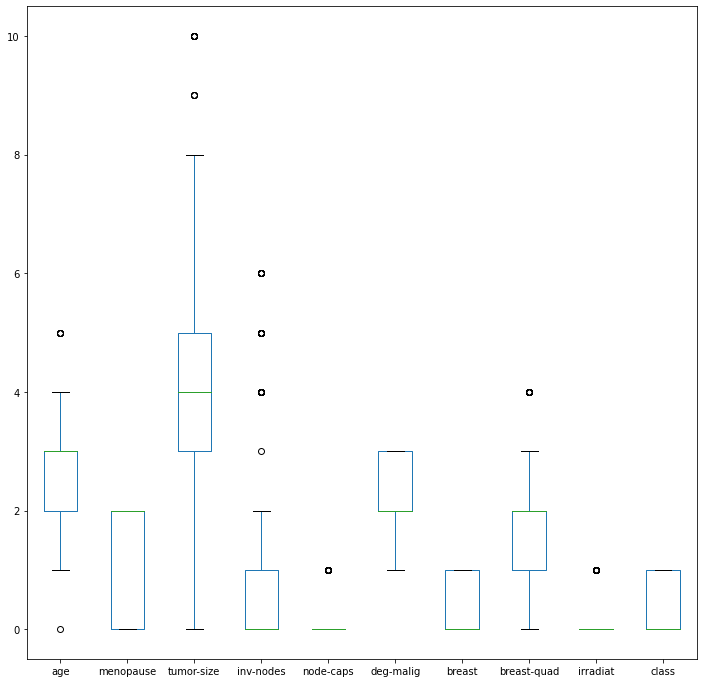

In [19]:
df_clean.plot(kind="box", figsize=(12,12));

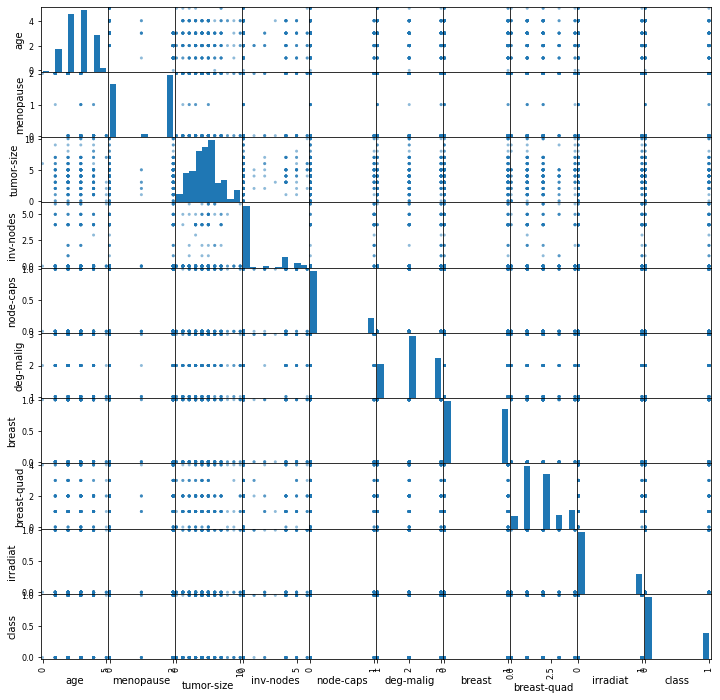

In [20]:
pd.plotting.scatter_matrix(df_clean, figsize=(12,12));

In [21]:
correlations = df_clean.corr(method='pearson')
display.display(correlations)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
age,1.000000,-0.720322,-0.016053,-0.042916,-0.054111,-0.085968,-0.041769,-0.049179,-0.042080,-0.071719
menopause,-0.720322,1.000000,-0.003838,-0.021208,0.034783,-0.043490,0.058056,0.090227,0.041752,0.052498
tumor-size,-0.016053,-0.003838,1.000000,0.149747,0.166080,0.163765,0.031215,0.152435,0.159568,0.130573
inv-nodes,-0.042916,-0.021208,0.149747,1.000000,0.624332,0.282365,0.022345,0.019429,0.382650,0.292088
node-caps,-0.054111,0.034783,0.166080,0.624332,1.000000,0.325930,-0.004198,0.068979,0.303955,0.276792
deg-malig,-0.085968,-0.043490,0.163765,0.282365,0.325930,1.000000,-0.052861,0.035408,0.208099,0.299400
breast,-0.041769,0.058056,0.031215,0.022345,-0.004198,-0.052861,1.000000,0.212082,0.018761,-0.058646
breast-quad,-0.049179,0.090227,0.152435,0.019429,0.068979,0.035408,0.212082,1.000000,0.016707,0.042268
irradiat,-0.042080,0.041752,0.159568,0.382650,0.303955,0.208099,0.018761,0.016707,1.000000,0.193912
class,-0.071719,0.052498,0.130573,0.292088,0.276792,0.299400,-0.058646,0.042268,0.193912,1.000000


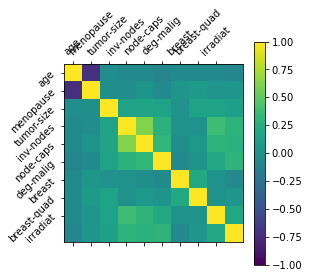

In [22]:
plt.matshow(correlations,vmin = -1, vmax = 1), plt.colorbar()
plt.xticks(np.arange(0,9), rotation = 45);
plt.yticks(np.arange(0,9), rotation = 45);
plt.gca().set_xticklabels(list(df_dataset.columns[:-1]));
plt.gca().set_yticklabels(list(df_dataset.columns[:-1]));

In [23]:
# Min-Max Normalization
scale_columns = ["age", "menopause", "tumor-size", "inv-nodes", "node-caps", "deg-malig", "breast", "breast-quad", "irradiat"]
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_clean[scale_columns])
df_clean_minmax = df_clean.copy()
df_clean_minmax[scale_columns] = minmax_scaler.transform(df_clean[scale_columns])
df_clean_minmax

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,0.4,1.0,0.2,0.000000,1.0,1.0,1.0,0.50,0.0,1
1,0.6,0.0,0.2,0.000000,0.0,0.0,1.0,0.00,0.0,0
2,0.6,0.0,0.6,0.000000,0.0,0.5,0.0,0.25,0.0,1
3,0.4,1.0,0.6,0.000000,1.0,1.0,1.0,0.25,1.0,0
4,0.4,1.0,0.5,0.666667,1.0,0.5,0.0,1.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
281,0.6,0.0,0.5,0.833333,1.0,0.5,0.0,0.25,0.0,0
282,0.6,1.0,0.4,0.666667,1.0,0.5,0.0,0.25,1.0,0
283,0.2,1.0,0.5,0.833333,1.0,0.5,1.0,1.00,0.0,0
284,0.6,1.0,0.2,0.000000,0.0,0.5,1.0,0.25,0.0,0


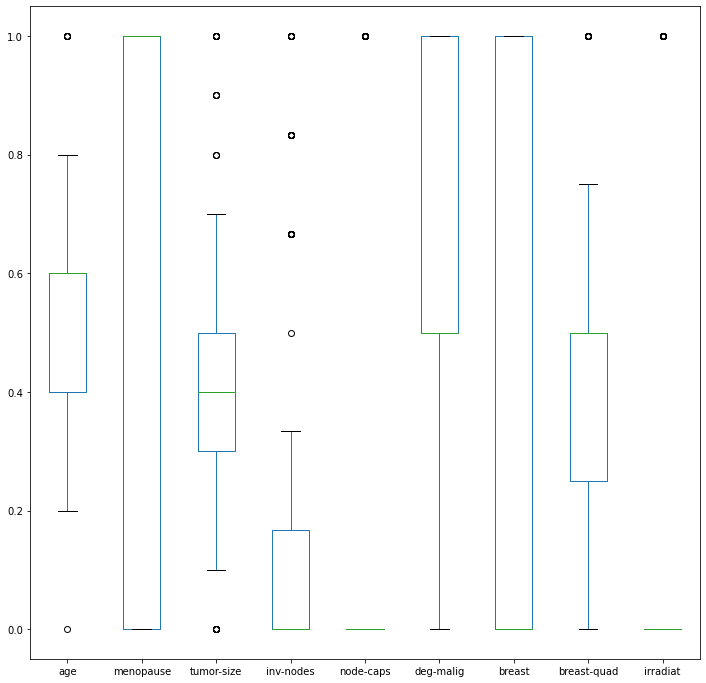

In [24]:
df_clean_minmax[scale_columns].plot(kind="box", figsize=(12,12));

In [25]:
# Standard Normalization
standard_scaler = StandardScaler()
standard_scaler.fit(df_clean[scale_columns])
df_clean_standard = df_clean.copy()
df_clean_standard[scale_columns] = standard_scaler.transform(df_clean[scale_columns])
df_clean_standard

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,-0.657727,0.940728,-0.960657,-0.555623,2.026609,1.290564,1.065049,0.205335,-0.558504,1
1,0.332325,-1.089825,-0.960657,-0.555623,-0.493435,-1.423416,1.065049,-1.629847,-0.558504,0
2,0.332325,-1.089825,0.902041,-0.555623,-0.493435,-0.066426,-0.938924,-0.712256,-0.558504,1
3,-0.657727,0.940728,0.902041,-0.555623,2.026609,1.290564,1.065049,-0.712256,1.790498,0
4,-0.657727,0.940728,0.436366,1.514841,2.026609,-0.066426,-0.938924,2.040517,-0.558504,1
...,...,...,...,...,...,...,...,...,...,...
281,0.332325,-1.089825,0.436366,2.032457,2.026609,-0.066426,-0.938924,-0.712256,-0.558504,0
282,0.332325,0.940728,-0.029308,1.514841,2.026609,-0.066426,-0.938924,-0.712256,1.790498,0
283,-1.647779,0.940728,0.436366,2.032457,2.026609,-0.066426,1.065049,2.040517,-0.558504,0
284,0.332325,0.940728,-0.960657,-0.555623,-0.493435,-0.066426,1.065049,-0.712256,-0.558504,0


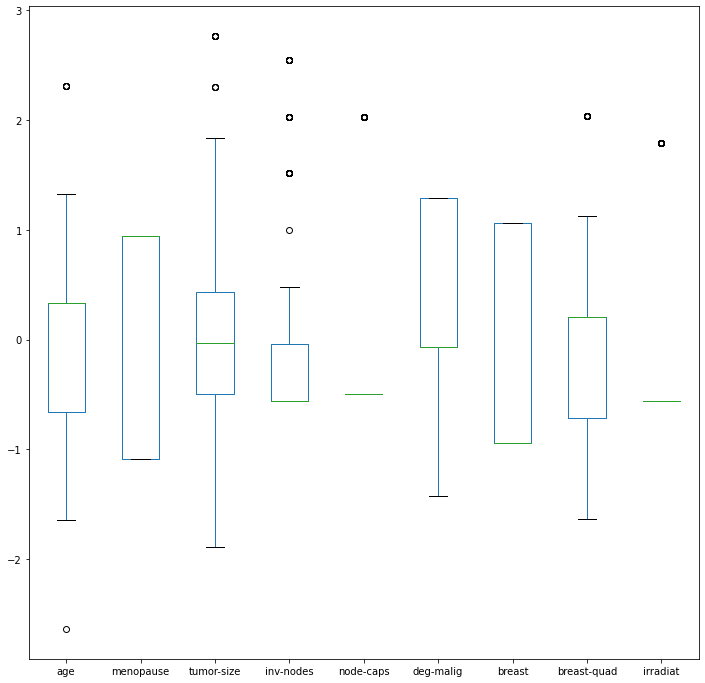

In [26]:
df_clean_standard[scale_columns].plot(kind="box", figsize=(12,12));

In [27]:
X_data, y_data = df_clean.values[:, :-1], df_clean.values[:, -1]
X_data.shape, y_data.shape
print(X_data[:20, :])
print(y_data[:20])

[[2 2 2 0 1 3 1 2 0]
 [3 0 2 0 0 1 1 0 0]
 [3 0 6 0 0 2 0 1 0]
 [2 2 6 0 1 3 1 1 1]
 [2 2 5 4 1 2 0 4 0]
 [3 2 4 4 0 2 1 2 1]
 [3 0 7 0 0 3 0 2 0]
 [2 2 1 0 0 2 0 2 0]
 [2 2 0 0 0 2 1 3 0]
 [2 0 7 2 1 2 1 2 1]
 [3 2 4 0 0 2 0 1 0]
 [4 0 2 0 0 2 1 2 0]
 [3 0 5 0 0 1 1 0 0]
 [3 0 4 0 0 2 1 2 0]
 [2 2 4 0 0 2 0 1 1]
 [1 2 3 0 0 3 0 0 0]
 [3 2 1 4 0 1 1 2 0]
 [4 0 2 0 0 2 1 2 0]
 [3 2 7 0 0 2 0 2 0]
 [3 0 3 0 0 3 0 2 0]]
[1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7)
print(f'+ Train/Test: Train Ratio = {len(X_train)/len(X_data)}')
print(f'+ Train: shape={X_train.shape}\nInput = \n{X_train[:5]}\nOutput = {y_train[:5]}')
print(f'+ Test: shape={X_test.shape}\nInput = \n{X_test[:5]}\nOutput = {y_test[:5]}')

+ Train/Test: Train Ratio = 0.6993006993006993
+ Train: shape=(200, 9)
Input = 
[[2 2 3 0 0 2 1 4 0]
 [4 0 5 0 0 1 0 2 0]
 [1 2 3 0 0 3 0 0 0]
 [3 2 4 0 0 1 1 2 0]
 [2 2 5 0 0 1 0 1 1]]
Output = [0 0 0 0 1]
+ Test: shape=(86, 9)
Input = 
[[4 0 1 0 0 1 0 2 0]
 [1 2 5 4 0 3 1 2 1]
 [3 0 5 5 1 2 0 1 0]
 [2 2 3 4 0 2 1 1 0]
 [3 0 3 0 0 2 1 0 0]]
Output = [0 1 0 0 1]


In [29]:
params = {}

params["data_split_train"] = 0.7
params["k_fold"] = 5
params["random_state"] = 10

print("params: ")
for k in params: print(f'+ {k}: {params[k]}')

# cố định random-state để phục hồi lại kết quả thí nghiệm
random.seed(params["random_state"])
os.environ['PYTHONHASHSEED'] = str(params["random_state"])
np.random.seed(params["random_state"])

params: 
+ data_split_train: 0.7
+ k_fold: 5
+ random_state: 10


NameError: name 'random' is not defined

In [30]:
kfold = KFold(n_splits=params["k_fold"], shuffle=True, random_state=params["random_state"])
print(f"+ X_train: {len(X_train)}")
for fold, (train_idx, valid_idx) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold}: ')
    print(f'+ train_idx: {train_idx}')
    print(f'+ valid_idx: {valid_idx}')
    print(f'+ train / valid: {valid_idx}')
    pass

+ X_train: 200
Fold 0: 
+ train_idx: [  0   3   4   6   7   8   9  11  12  13  14  15  16  17  18  21  22  23
  24  25  26  27  28  29  30  31  32  33  34  36  37  38  40  41  42  43
  44  45  48  49  50  51  53  54  56  57  58  60  62  64  65  66  67  68
  70  71  72  73  74  77  79  80  81  82  83  84  85  86  88  89  90  92
  93  94  95  96  97  99 100 101 103 104 105 106 107 108 110 112 113 114
 115 116 117 118 119 120 122 123 125 126 128 129 131 132 133 134 135 137
 138 139 140 141 143 144 145 146 147 148 149 150 151 152 153 155 156 157
 158 160 161 163 164 165 166 167 168 170 171 173 175 176 177 179 180 181
 182 183 184 186 187 188 189 190 191 192 193 194 195 196 197 199]
+ valid_idx: [  1   2   5  10  19  20  35  39  46  47  52  55  59  61  63  69  75  76
  78  87  91  98 102 109 111 121 124 127 130 136 142 154 159 162 169 172
 174 178 185 198]
+ train / valid: [  1   2   5  10  19  20  35  39  46  47  52  55  59  61  63  69  75  76
  78  87  91  98 102 109 111 121 124 127 130 1

In [31]:
# Mô hình mặc định (models, results, hyper-parameters)
baseline_models  = {}
baseline_results = {}

# khởi tạo các tham số mặc định
baseline_models['LR']   = LogisticRegression(random_state=params["random_state"])
baseline_models['LDA']  = LinearDiscriminantAnalysis()
baseline_models['KNN']  = KNeighborsClassifier()
baseline_models['CART'] = DecisionTreeClassifier(random_state=params["random_state"])
baseline_models['NB']   = GaussianNB()
baseline_models['SVM']  = SVC(random_state=params["random_state"])

# Huấn luyện từng mô hình cơ sở
for model_name in baseline_models:
        
    baseline_results[model_name] = []
    print(f'Model [{model_name}]:')
    
    # Chiến lược chia dữ liệu trên tập X_train
    kfold = KFold(n_splits=params["k_fold"], shuffle=True, random_state=params["random_state"])
    
    # Tách X_train, y_train thành 2 tập train, valid trên từng fold
    # Với mỗi fold, train cho huấn luyện, valid cho lượng giá và điều chỉnh tham số
    for fold, (train_idx, valid_idx) in enumerate(kfold.split(X_train, y_train)):
        # Chia 2 tập thành train/valid
        X1_train, y1_train = X_train[train_idx], y_train[train_idx]
        X1_valid, y1_valid = X_train[valid_idx], y_train[valid_idx]
        
             
        # Lấy mô hình khởi tạo
        model_clf = sklearn.base.clone(baseline_models[model_name])
        
        # Huấn luyện mô hình
        model_clf.fit(X1_train, y1_train)
        
        # Lượng giá mô hình
        y1_pred_valid = model_clf.predict(X1_valid)
               
        # Tính toán metrics: accuracy
        valid_acc = accuracy_score(y1_valid, y1_pred_valid)
        
        # Lưu metrics trên từng fold
        baseline_results[model_name].append(valid_acc)
        
        pass # fold
    # Chúng ta đơn giản sử dụng lệnh bên dưới thay cho khối lệnh k-fold bên trên
    # baseline_results[name] = cross_val_score(model_clf, X_train, y_train, cv = kfold, scoring="accuracy")
    
    # hiển thị tham số mô hình
    print(f'+ params = {baseline_models[model_name].get_params()}')
    
    # hiển thị kết quả trên từng fold
    print(f'+ acc = {baseline_results[model_name]}')
    
    # trung bình kết quả +/ std cho tất cả các fold, 
    # std: độ lệch chuẩn=> nếu cùng mean thì độ lệch nào nhỏ hơn thì tốt hơn vì ổn định và tập trung hơn
    s_msg = f'+ mean_acc = {np.mean(baseline_results[model_name]):.6f} +/- {np.std(baseline_results[model_name]):.6f}'
    print(s_msg)
    print()
    
    # Huấn luyện lại với trên toàn bộ dữ liệu train (re-fit all train_data)
    baseline_models[model_name].fit(X_train, y_train)
    pass # model

Model [LR]:
+ params = {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 10, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
+ acc = [0.7, 0.8, 0.675, 0.625, 0.8]
+ mean_acc = 0.720000 +/- 0.069642

Model [LDA]:
+ params = {'covariance_estimator': None, 'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}
+ acc = [0.725, 0.775, 0.675, 0.575, 0.825]
+ mean_acc = 0.715000 +/- 0.086023

Model [KNN]:
+ params = {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
+ acc = [0.625, 0.675, 0.7, 0.525, 0.725]
+ mean_acc = 0.650000 +/- 0.070711

Model [CART]:
+ params = {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None

NameError: name 'ticker' is not defined

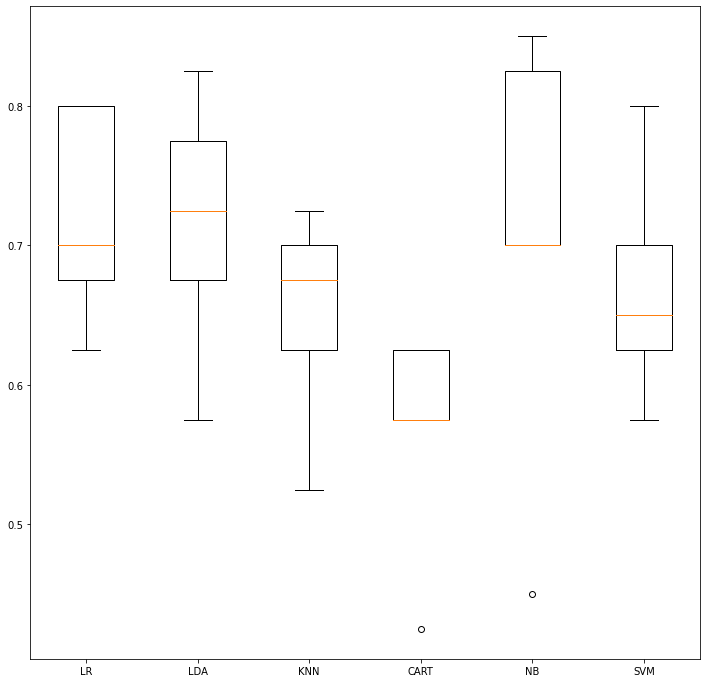

In [32]:
plt.figure(figsize=(12,12))
plt.boxplot(baseline_results.values())
plt.gca().set_xticklabels(baseline_results.keys())
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.01))
plt.title(f'Độ chính xác của baseline (K-Fold = {params["k_fold"]})')
plt.show()

In [ ]:
tunning_results = {
    "best_clf"   : {},
    "best_score" : {},
}

tunning_models  = {}
tunning_params  = {}

# khởi tạo các tham số mặc định
tunning_models['KNN']  = KNeighborsClassifier()
tunning_params['KNN']  = {
    'n_neighbors': [2, 4, 6, 8, 10],
}

tunning_models['SVM']  = SVC(decision_function_shape = 'ovr', 
                             class_weight = 'balanced',
                             probability  = True,
                             random_state = params["random_state"])
tunning_params['SVM']  = {
    'kernel': ['linear', 'rbf'], # 'sigmoid', 'poly'
    'C': [1, 10, 100, 200], # 50, 70
    'gamma': [1e-3, 1e-2], # 1e-4
}

for model_name in tunning_models:
    model_clf = tunning_models[model_name]
        
    print(f'Model [{model_name}]:')
    
    kfold = KFold(n_splits=params["k_fold"], shuffle=True, random_state=params["random_state"])    
       
    grid_clf = GridSearchCV(estimator=model_clf, 
                            param_grid=tunning_params[model_name], 
                            cv = kfold, scoring="accuracy")
    grid_result = grid_clf.fit(X_train, y_train)
    
    # store best model
    tunning_results["best_clf"][model_name] = grid_clf.best_estimator_    
    
    # get search results
    tunning_results["best_score"][model_name] = grid_result.best_score_
    

    # information
    print(f'+ Best score: {grid_result.best_score_}')
    print(f'+ Best turnning params: {grid_result.best_params_}')
    print(f'+ Best full params: {grid_clf.best_estimator_.get_params()}')
    print()
    
    pass

Model [KNN]:
+ Best score: 0.6799999999999999
+ Best turnning params: {'n_neighbors': 6}
+ Best full params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}

Model [SVM]:
+ Best score: 0.7050000000000001
+ Best turnning params: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
+ Best full params: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 10, 'shrinking': True, 'tol': 0.001, 'verbose': False}



Baseline [LR]
+ acc = 0.733


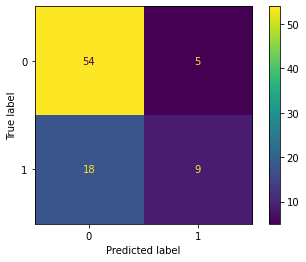

Baseline [LDA]
+ acc = 0.686


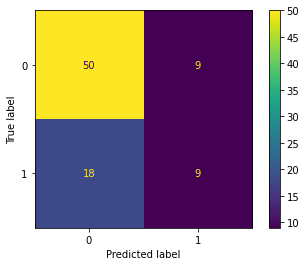

Baseline [KNN]
+ acc = 0.721


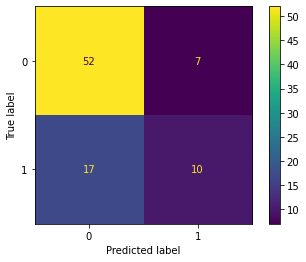

Baseline [CART]
+ acc = 0.698


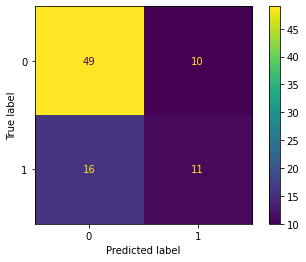

Baseline [NB]
+ acc = 0.721


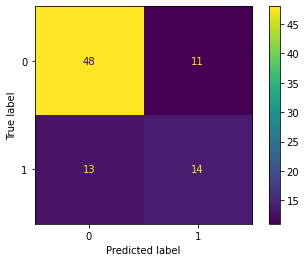

Baseline [SVM]
+ acc = 0.744


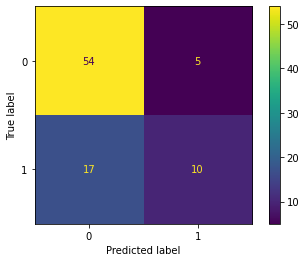

In [ ]:
test_models  = {}
test_scores  = {}

# Kiểm tra kết quả trên tập test (baseline)
for model_name in baseline_models:
    model_clf = baseline_models[model_name]
    y_pred_test = model_clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    # information
    print(f'Baseline [{model_name}]')
    print(f'+ acc = {test_acc:.3f}')
    plot_confusion_matrix(model_clf, X_test, y_test)
    plt.show()

Tunning [KNN]
+ acc = 0.686


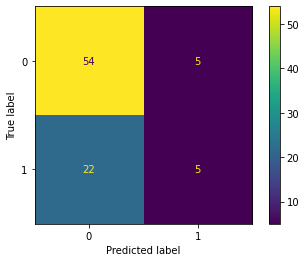

Tunning [SVM]
+ acc = 0.709


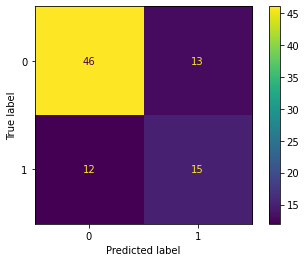

In [ ]:
# Kiểm tra kết quả trên tập test (baseline)
for model_name in tunning_models:
    model_clf = tunning_results["best_clf"][model_name]
    y_pred_test = model_clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    # information
    print(f'Tunning [{model_name}]')
    print(f'+ acc = {test_acc:.3f}')
    plot_confusion_matrix(model_clf, X_test, y_test)
    plt.show()